In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math


In [2]:
path='/content/drive/MyDrive/DIP/Assignment04/'

**DownSample by 2**

In [4]:
def downsample(img,k):
  h=img.shape[0]
  w=img.shape[1]
  h1=h//k
  w1=w//k
  d=np.zeros((h1,w1))
  for i in range(0,h1):
    for j in range(0,w1):
      d[i,j]=img[k*i,k*j]
  return d

def run_Q1a():
  img=plt.imread(path+'barbara.tif')
  ds_img=downsample(img,2)
  plt.imsave(path+'output/downsample.png',ds_img,cmap='gray')
  return ds_img,img

**Gassian Filter then Downsample**

In [5]:
def Gauss_filter(img,fsize,sigma):
  mask=np.zeros((fsize,fsize))
  for i in range(0,fsize):
    for j in range(0,fsize):
      mask[i,j]=np.exp(-((i-fsize//2)**2+(j-fsize//2)**2)/(2*(sigma**2))) / (2*np.pi*(sigma**2))
  mask=mask/np.sum(mask)
  t=cv2.filter2D(img,-1,mask)
  return t

def run_Q1b():
  img=plt.imread(path+'barbara.tif')
  gds_img=downsample(Gauss_filter(img,5,1),2)
  plt.imsave(path+'output/gauss_downsample.png',gds_img,cmap='gray')
  return gds_img

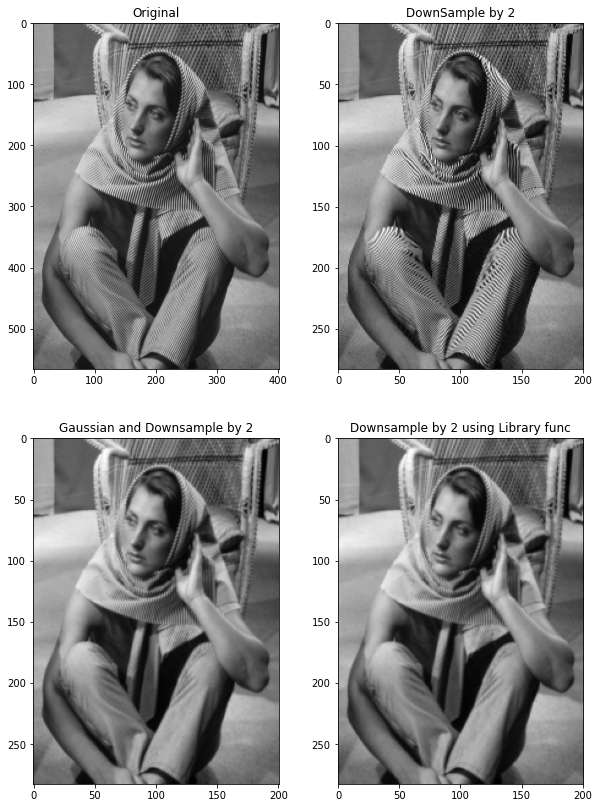

In [17]:
if __name__=='__main__':
  ds_img,img=run_Q1a()
  gds_img=run_Q1b()
  plt.figure(figsize=(10,14))
  plt.subplot(2,2,1)
  plt.title("Original")
  plt.imshow(img,cmap='gray')
  plt.subplot(2,2,2)
  plt.title("DownSample by 2")
  plt.imshow(ds_img,cmap='gray')
  plt.subplot(2,2,3)
  plt.title("Gaussian and Downsample by 2")
  plt.imshow(gds_img,cmap='gray')
  inbuilt=cv2.pyrDown(img)#cv2.resize(img,tuple([img.shape[1]//2,img.shape[0]//2]),interpolation = cv2.INTER_NEAREST)
  plt.subplot(2,2,4)
  plt.title("Downsample by 2 using Library func")
  plt.imshow(inbuilt,cmap='gray')
  plt.savefig(path+'downsampling.png')